In [1]:
# IO: do this:
#source activate fullenv
#python -m ipykernel install --user --name fullenv --display-name "fullenv"
# also see this https://anbasile.github.io/posts/2017-06-25-jupyter-venv/
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
bg_file_list = glob.glob("/Users/inesochoa/PhysicsWorkdir/snowmassWorkDir/ILCAnomalies/processed*background*.txt")
signal_file_list = glob.glob("//Users/inesochoa/PhysicsWorkdir/snowmassWorkDir/ILCAnomalies/processed_lhe*signal.txt")

# Using DNN with Nsubjettiness variables from EnergyFlow package

## Data parsing, plotting, ...

In [3]:
#From Ben, function to parse files:
def parse_file(file_object):
    all_records = []
    mymeasuredenergy = []

    count = 0
    for line in file_object:

        metadata = line.split("J")[0]
        eventinfo = line.split("J")[1]
        jets = eventinfo.split("P")[0]
        particles = eventinfo.split("P")[1]

        this_record = {}
        this_record['label'] = count
        count += 1
        eventweight = float(metadata.split()[0])
        this_record['eventweight'] = eventweight #this is the event "weight".  Let's ignoreit for now (we will need it later).
        njets = int(len(jets.split())/11) #number of "jets"

        nparticles  = int(len(particles.split())/5) #number of particles

        #True collision quantities
        this_record['truthcenterofmassenergy'] = float(metadata.split()[1]) #true total energy - should be delta function at 1000 GeV
        this_record['truthsqrtshat'] = float(metadata.split()[2]) #energy available for making new particles (electron energy - photon)
        this_record['truthphotonpT'] = float(metadata.split()[3]) #photon momentum |p| in units of GeV
        this_record['truthphotoneta'] = float(metadata.split()[4]) #photon pseudorapidity (~polar angle - see e.g. https://en.wikipedia.org/wiki/Pseudorapidity)
        this_record['truthphotonphi'] = float(metadata.split()[5]) #photon azimuthal angle

        #Measured collision quantities
        measuredcenterofmassenergy  = float(metadata.split()[6]) #true measured energy - should be noisy version of truthcenterofmassenergy
        this_record['measuredcenterofmassenergy'] = measuredcenterofmassenergy
        this_record['measuredsqrtshat'] = float(metadata.split()[7]) #energy available for making new particles (electron energy - photon)
        this_record['measuredphotonpT'] = float(metadata.split()[8]) #photon momentum |p| in units of GeV
        this_record['measuredphotoneta'] = float(metadata.split()[9]) #photon pseudorapidity (~polar angle - see e.g. https://en.wikipedia.org/wiki/Pseudorapidity)
        this_record['measuredphotonphi'] = float(metadata.split()[10]) #photon azimuthal angle
        this_record['metadata'] = metadata.split()

        mymeasuredenergy+=[measuredcenterofmassenergy]

        this_record['njets'] = njets
        jets = jets.split()
        jets_vec = []
        for i in range(njets):
            jet = np.zeros(11)
            #order:
            # - index
            # - magnitude of momentum |p| (units of GeV)
            # - pseudorapidity (~polar angle - see e.g. https://en.wikipedia.org/wiki/Pseudorapidity)
            # - azimuthal angle
            # - mass (units of GeV/c^2)
            # - bit encoding of the jet "flavor" (not totally sure what the bit means, but will look it up)
            # - 0th angular moment of jet radiation
            # - 1th angular moment of jet radiation
            # - 2th angular moment of jet radiation
            # - 3th angular moment of jet radiation
            # - 4th angular moment of jet radiation
            jet = jets[i*11:i*11+11]
            jets_vec+=[jet]

        this_record['jets']=jets_vec

        this_record['nparticles'] = nparticles

        particles = particles.split()
        particles_vec = []
        for i in range(nparticles):
            particle = np.zeros(5)
            #order:
            # - index
            # - magnitude of momentum |p| (units of GeV)
            # - pseudorapidity (~polar angle - see e.g. https://en.wikipedia.org/wiki/Pseudorapidity)
            # - azimuthal angle
            # - particle identifier (https://pdg.lbl.gov/2006/reviews/pdf-files/montecarlo-web.pdf)
            particle = particles[i*5:i*5+5]
            particles_vec+=[particle]
            #print(particles[i*5],particles[i*5+1],particles[i*5+2],particles[i*5+3],particles[i*5+4])
        this_record['particles'] = particles_vec

        
        all_records.append(this_record)
    return all_records

In [4]:
bg_file_list

['/Users/inesochoa/PhysicsWorkdir/snowmassWorkDir/ILCAnomalies/processed_background_randomseeds_bigger6.txt',
 '/Users/inesochoa/PhysicsWorkdir/snowmassWorkDir/ILCAnomalies/processed_background_randomseeds_bigger5.txt',
 '/Users/inesochoa/PhysicsWorkdir/snowmassWorkDir/ILCAnomalies/processed_background_randomseeds_bigger4.txt',
 '/Users/inesochoa/PhysicsWorkdir/snowmassWorkDir/ILCAnomalies/processed_background_randomseeds_bigger1.txt',
 '/Users/inesochoa/PhysicsWorkdir/snowmassWorkDir/ILCAnomalies/processed_background_randomseeds_bigger3.txt',
 '/Users/inesochoa/PhysicsWorkdir/snowmassWorkDir/ILCAnomalies/processed_background_randomseeds_bigger2.txt',
 '/Users/inesochoa/PhysicsWorkdir/snowmassWorkDir/ILCAnomalies/processed_lhe004_background.txt',
 '/Users/inesochoa/PhysicsWorkdir/snowmassWorkDir/ILCAnomalies/processed_lhe003_background.txt',
 '/Users/inesochoa/PhysicsWorkdir/snowmassWorkDir/ILCAnomalies/processed_lhe002_background.txt',
 '/Users/inesochoa/PhysicsWorkdir/snowmassWorkDir

In [7]:
bg_file_list=["/Users/inesochoa/PhysicsWorkdir/snowmassWorkDir/ILCAnomalies/processed_background_randomseeds_bigger6.txt"]

In [8]:
bg_records = []
for filename in bg_file_list:
    file = open(filename)
    bg_records += parse_file(file)
#sig_records = []
#for filename in signal_file_list:
#    file = open(filename)
#    sig_records += parse_file(file)

In [9]:
len(bg_records)

792983

In [10]:
sig_records = []
for filename in signal_file_list:
    file = open(filename)
    sig_records += parse_file(file)

In [11]:
len(sig_records)

100000

In [12]:
for i in sig_records:
    i['from_anomaly_data'] = True
for i in bg_records:
    i['from_anomaly_data'] = False

In [13]:
all_records = sig_records[:10000] + bg_records

In [14]:
for i in bg_records[8:9]:
    pt = i['jets'][0][1]
    print(pt)

93.9736


In [15]:
def plot_jets(jet,varindex,varname,R,doLog):
    plt.figure(figsize=(20,5))
    sig_arr = np.array([float(i['jets'][jet][varindex]) for i in sig_records[:10000]])
    bkg_arr = np.array([float(i['jets'][jet][varindex]) for i in bg_records[:10000]])
    #print(bkg_arr)
    plt.hist(bkg_arr, R, color="steelblue", histtype='step', linewidth=2)
    plt.hist(sig_arr, R, color="tomato", histtype='step', linewidth=2)
    #plt.hist(this_arr, bins=np.logspace(1.5,3,30))
    #plt.xscale('log')
    #plt.xticks(R)
    plt.xlabel(varname)
    if doLog == True: plt.yscale('log')
    plt.ylabel("Number of Events / bin")

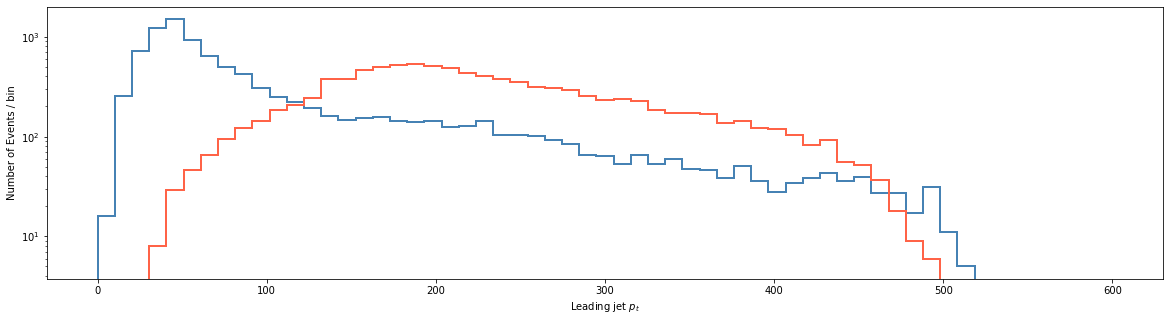

In [16]:
plot_jets(0,1,"Leading jet $p_{t}$",np.linspace(0,600,60),1)

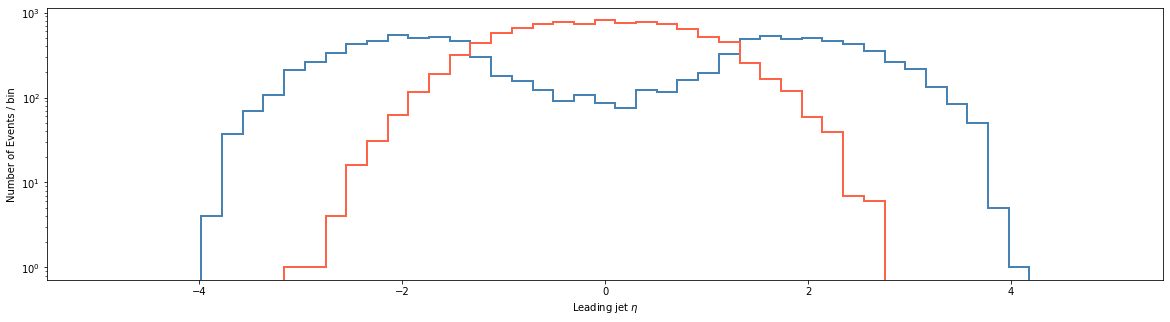

In [17]:
plot_jets(0,2,"Leading jet $\eta$",np.linspace(-5,5,50),1)

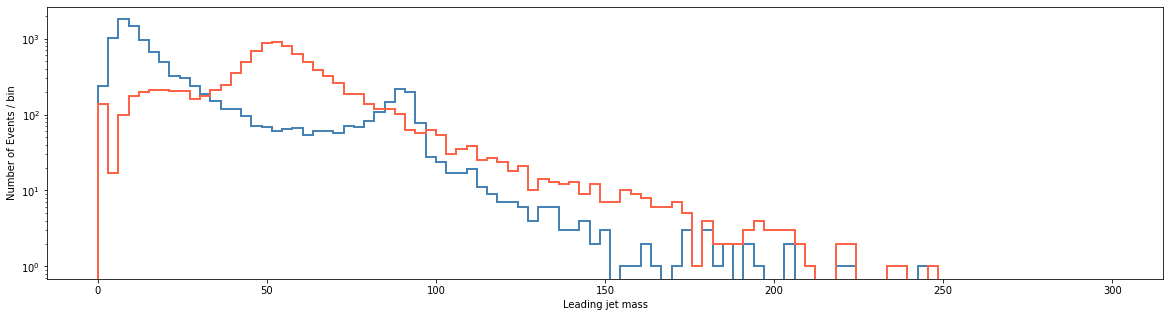

In [18]:
plot_jets(0,4,"Leading jet mass",np.linspace(0,300,100),1)

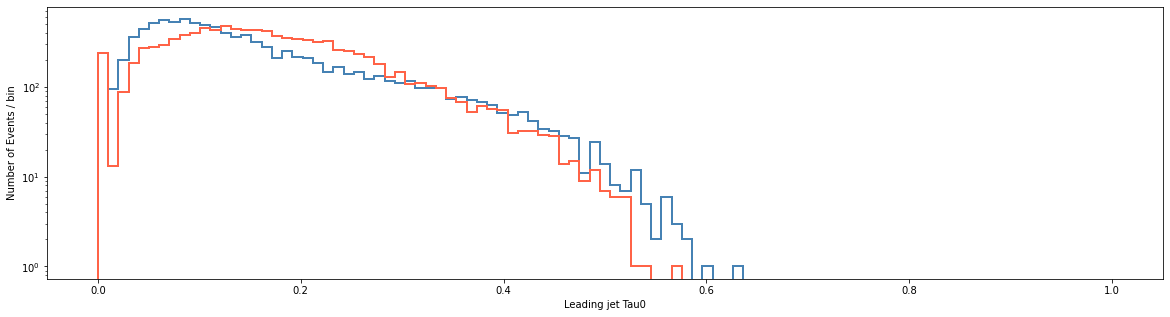

In [19]:
plot_jets(0,6,"Leading jet Tau0",np.linspace(0,1,100),1)

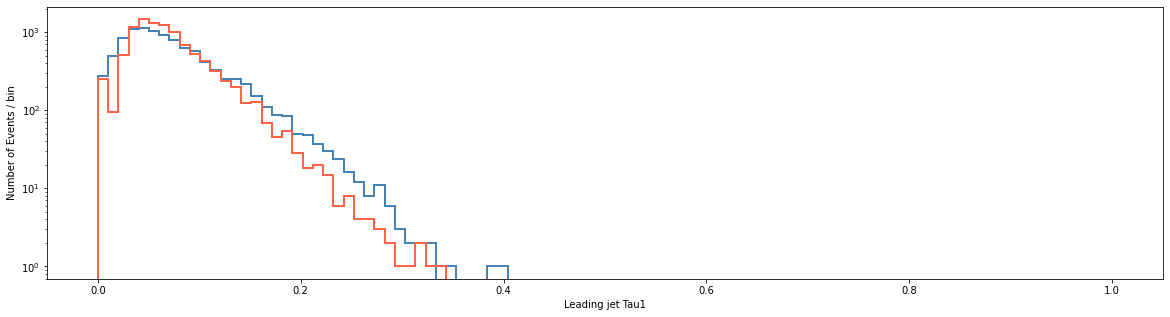

In [13]:
plot_jets(0,7,"Leading jet Tau1",np.linspace(0,1,100),1)

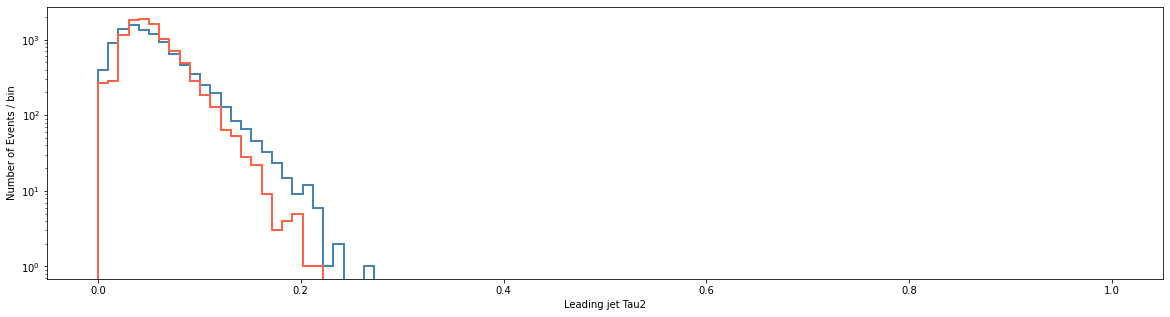

In [14]:
plot_jets(0,8,"Leading jet Tau2",np.linspace(0,1,100),1)

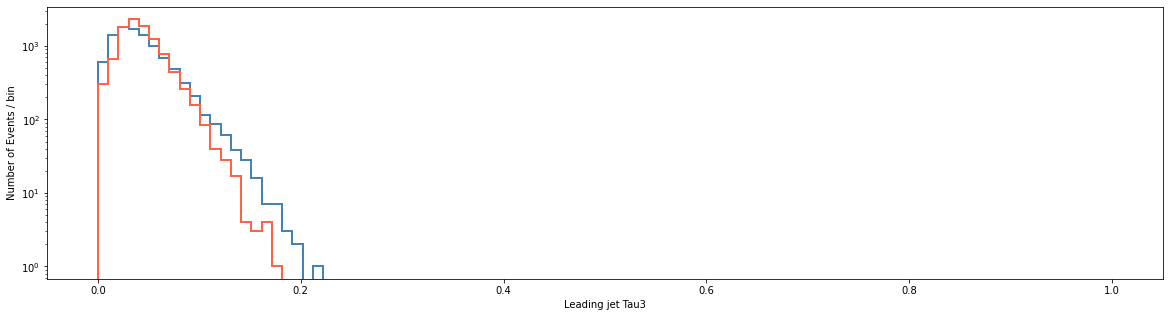

In [15]:
plot_jets(0,9,"Leading jet Tau3",np.linspace(0,1,100),1)

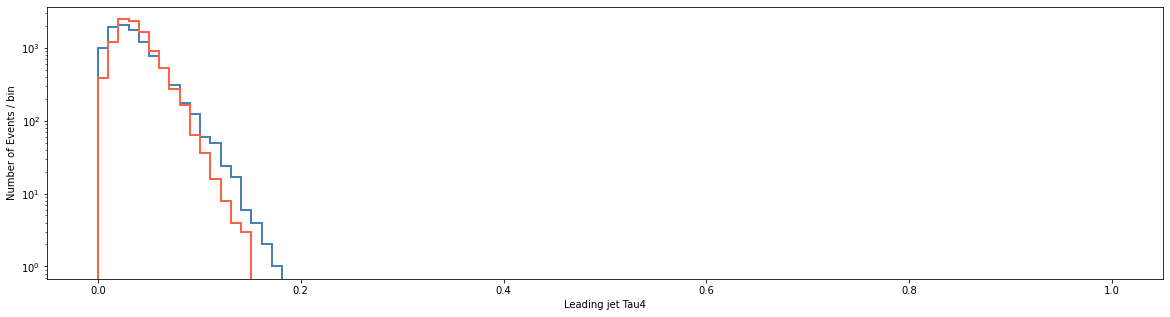

In [16]:
plot_jets(0,10,"Leading jet Tau4",np.linspace(0,1,100),1)

## Features for jets

In [359]:
# use two jets only 
max_njets = max([i['njets'] for i in all_records])


In [360]:
print(max_njets)

8


### Make new arrays for background+signal and signal only, extracting only n-subjettiness

In [413]:
def make_arrays(these_records):
    padded_jet_arrays =[]
    for i,record in enumerate(these_records):
        # convert to np array
        these_jets = np.array(record['jets']).astype('float')
        if len(these_jets) == 0:
            these_jets = np.zeros(11).reshape([1,11])
        these_jets = these_jets[:,6:11] # only want nsubjettiness
        
        # determine how many zero values to pad
        pad_length = max_njets - these_jets.shape[0]
        #pad_length = 2#max_njets - these_jets.shape[0]
        #pad
        padded_jets = np.pad(these_jets, ((0,pad_length),(0,0))) 
        #print(i,pad_length, these_jets.shape[0], padded_jets.shape)
        # check padding
        assert padded_jets.shape == (max_njets, 5)
        # add to list
        padded_jet_arrays.append(padded_jets)
    return np.array(padded_jet_arrays)

In [414]:
X = make_arrays(all_records)
X_bg = make_arrays(bg_records)
X_sig = make_arrays(sig_records)
#bg_records[68665]
#test_jets = np.array(bg_records[68665]['jets']).astype('float')
#test_jets = np.zeros(11).reshape([1,11])
#print(test_jets)

In [415]:
X_sig[0]

array([[0.144761 , 0.046199 , 0.0388306, 0.0330971, 0.0306396],
       [0.360191 , 0.171151 , 0.122468 , 0.106163 , 0.0936488],
       [0.       , 0.       , 0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       , 0.       ]])

In [416]:
X[0] # this is the same entry as X_sig

array([[0.144761 , 0.046199 , 0.0388306, 0.0330971, 0.0306396],
       [0.360191 , 0.171151 , 0.122468 , 0.106163 , 0.0936488],
       [0.       , 0.       , 0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       , 0.       ]])

In [424]:
X_sig[2].shape

(8, 5)

In [422]:
X_sig.shape

(100000, 8, 5)

In [425]:
X_sig = X_sig.reshape(100000,40)

In [426]:
X.shape

(89999, 8, 5)

In [427]:
X = X.reshape(89999,40)

In [434]:
X_bg.shape

(79999, 8, 5)

In [435]:
X_bg = X_bg.reshape(79999,40)

In [436]:
y_bg = np.array([i['truthsqrtshat'] for i in bg_records])
y_sig = np.array([i['truthsqrtshat'] for i in sig_records])

In [493]:
sb_low = 100
sb_high = 600
sr_low = 300
sr_high = 400
def binary_side_band(y_thing):
    if y_thing >= sr_low and y_thing < sr_high:
        return 1
    elif y_thing >= sb_low and y_thing < sb_high:
        return 0
    else:
        return -1

In [494]:
y_bg_binary = np.vectorize(binary_side_band)(y_bg)
np.unique(y_bg_binary,return_counts = True)

(array([-1,  0,  1]), array([61233, 16504,  2262]))

In [495]:
y_bg

array([ 91.9595,  95.3535, 727.701 , ...,  91.9365, 692.473 ,  93.0525])

Text(0, 0.5, 'Number of Events / bin')

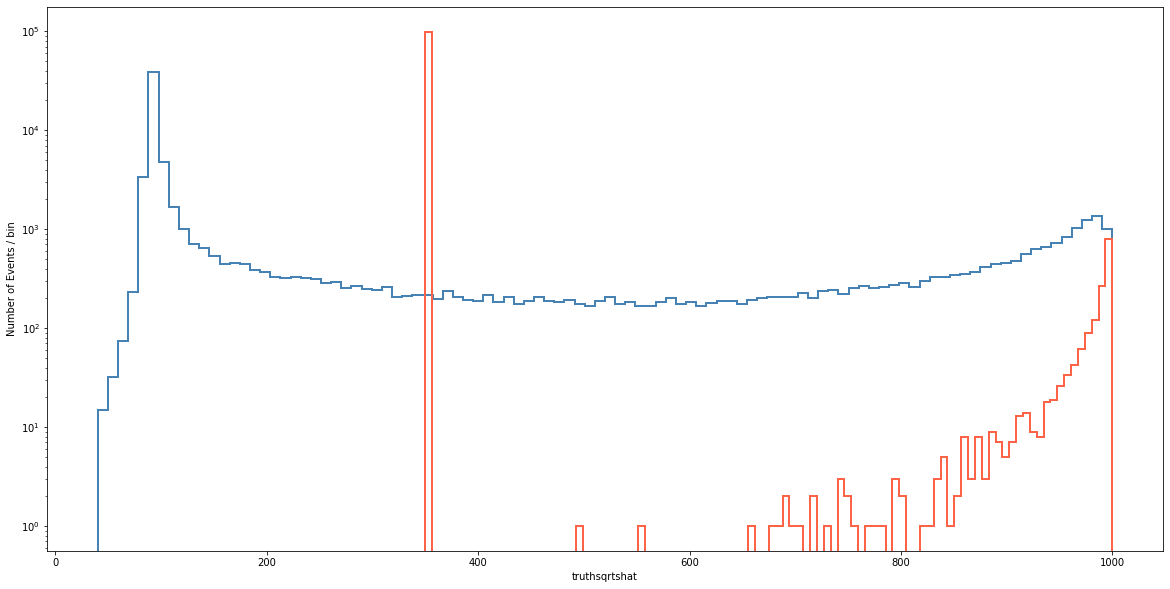

In [496]:
plt.figure(figsize=(20,10))
plt.hist(y_bg, color="steelblue", histtype='step', linewidth=2, bins=100)
plt.hist(y_sig, color="tomato", histtype='step', linewidth=2, bins=100)
plt.yscale('log')
#plt.xticks(range(0,1000,20))
plt.xlabel("truthsqrtshat")
plt.ylabel("Number of Events / bin")
#np.save('training_data/bg_truthsqrtshat', this_arr)

_Need to check high sqrtshat values in signal_

### Create arrays for bg in SR, SB + signal 

In [497]:
side_band_indicator = (y_bg_binary == 0)
# This is the background data in the SB
X_sideband = X_bg[side_band_indicator]
y_sideband = y_bg_binary[side_band_indicator]

In [498]:
within_bounds_indicator = (y_bg_binary == 1)
# This is the background data in the SR
X_selected = X_bg[within_bounds_indicator]
y_selected = y_bg_binary[within_bounds_indicator]

# NN training

In [499]:
from sklearn.utils import shuffle
import energyflow as ef
from energyflow.archs import DNN
from energyflow.utils import data_split, remap_pids, to_categorical
from sklearn.metrics import roc_auc_score, roc_curve
import math

In [500]:
#X_shuffled, y_shuffled = shuffle(X_selected, y_selected)
#train, val, test = 18000, 2000, 1186

In [501]:
'''
def prep_and_shufflesplit_data(anomaly_ratio, size_each = 50000, shuffle_seed = 69, train = 0.7, val = 0.2, test = 0.1):
    
    print(X_sideband.shape[0])
    print(X_selected.shape[0])
    #assert (size_each <= min(X_sideband.shape[0], X_selected.shape[0])) #Sel was sig
    
    #how much bg and signal data to take?
    anom_size = round(anomaly_ratio * size_each)
    bg_sig_size = size_each - anom_size
    
    # select sideband datapoints
    this_X_sideband = X_sideband[:size_each]
    this_y_sideband = y_sideband[:size_each]
    
    # duplicate bgsignal datapoints
    #this_X_bgsignal = np.copy(X_bgsignal)
    #this_y_bgsignal = np.copy(y_bgsignal)
    this_X_bgsignal = np.copy(X_selected) #io
    this_y_bgsignal = np.copy(y_selected) #io
        
    (this_X_bgsignal, this_X_bgsignal_v, this_X_bgsignal_t,
     this_y_bgsignal, this_y_bgsignal_v, this_y_bgsignal_t) = data_split(this_X_bgsignal, this_y_bgsignal, val=val, test=test)
    
    bg_sig_size_tr = round(bg_sig_size * train)
    
    if this_X_bgsignal.shape[0] < bg_sig_size_tr:
        
        multiplier = math.ceil(bg_sig_size_tr/this_X_bgsignal.shape[0])
        
        this_X_bgsignal = np.concatenate([this_X_bgsignal] * multiplier)
        this_y_bgsignal = np.concatenate([this_y_bgsignal] * multiplier)
        
        this_X_bgsignal_v = np.concatenate([this_X_bgsignal_v] * multiplier)
        this_y_bgsignal_v = np.concatenate([this_y_bgsignal_v] * multiplier)
        
        this_X_bgsignal_t = np.concatenate([this_X_bgsignal_t] * multiplier)
        this_y_bgsignal_t = np.concatenate([this_y_bgsignal_t] * multiplier)
        
        
        
    assert this_X_bgsignal.shape[0] == this_y_bgsignal.shape[0]
    
    #select bgsignal datapoints
    this_X_bgsignal = this_X_bgsignal[:bg_sig_size_tr]
    this_y_bgsignal = this_y_bgsignal[:bg_sig_size_tr]
    
    this_X_bgsignal_v = this_X_bgsignal_v[:round(bg_sig_size * val)]
    this_y_bgsignal_v = this_y_bgsignal_v[:round(bg_sig_size * val)]
    
    this_X_bgsignal_t = this_X_bgsignal_t[:round(bg_sig_size * test)]
    this_y_bgsignal_t = this_y_bgsignal_t[:round(bg_sig_size * test)]
    
    #select anomaly datapoints
    this_X_anom = X_sig[:anom_size]
    this_y_anom = np.ones(anom_size)
    
    
    
    # only bg_sig has been split. Now, we have to shuffle then split the others.
    this_X = np.concatenate([this_X_sideband, this_X_anom])
    this_y = np.concatenate([this_y_sideband, this_y_anom])
    
    assert this_X.shape[0] == this_y.shape[0]
    this_X, this_y = shuffle(this_X, this_y, random_state = shuffle_seed)
    
    (this_X_train, this_X_val, this_X_test,
     this_y_train, this_y_val, this_y_test) = data_split(this_X, this_y, val=val, test=test)
    
    # now, we can add the bg_sig to the rest of the data and shuffle again
    X_train, y_train = shuffle(np.concatenate([this_X_train, this_X_bgsignal]),
                               np.concatenate([this_y_train, this_y_bgsignal]),
                              random_state = shuffle_seed)
    X_val, y_val = shuffle(np.concatenate([this_X_val, this_X_bgsignal_v]),
                               np.concatenate([this_y_val, this_y_bgsignal_v]),
                              random_state = shuffle_seed)
    X_test, y_test = shuffle(np.concatenate([this_X_test, this_X_bgsignal_t]),
                               np.concatenate([this_y_test, this_y_bgsignal_t]),
                              random_state = shuffle_seed)
    
    
    # Centre and normalize all the Xs
    for x in X_train:
        #mask = x[:,0] > 0
        #yphi_avg = np.average(x[mask,1:3], weights=x[mask,0], axis=0)
        #x[mask,1:3] -= yphi_avg
        x /= x.sum()
    for x in X_val:
        #mask = x[:,0] > 0
        #yphi_avg = np.average(x[mask,1:3], weights=x[mask,0], axis=0)
        #x[mask,1:3] -= yphi_avg
        #x[mask,0] /= x[:,0].sum()
        x /= x.sum()
    for x in X_test:
        #mask = x[:,0] > 0
        #yphi_avg = np.average(x[mask,1:3], weights=x[mask,0], axis=0)
        #x[mask,1:3] -= yphi_avg
        #x[mask,0] /= x[:,0].sum()
        x /= x.sum()
    
    # remap PIDs for all the Xs
    #remap_pids(X_train, pid_i=3)
    #remap_pids(X_val, pid_i=3)
    #remap_pids(X_test, pid_i=3)
    
    # change Y to categorical Matrix
    Y_train = to_categorical(y_train, num_classes=2)
    Y_val = to_categorical(y_val, num_classes=2)
    Y_test = to_categorical(y_test, num_classes=2)

    
    return X_train, X_val, X_test, Y_train,Y_val,Y_test
'''

'\ndef prep_and_shufflesplit_data(anomaly_ratio, size_each = 50000, shuffle_seed = 69, train = 0.7, val = 0.2, test = 0.1):\n    \n    print(X_sideband.shape[0])\n    print(X_selected.shape[0])\n    #assert (size_each <= min(X_sideband.shape[0], X_selected.shape[0])) #Sel was sig\n    \n    #how much bg and signal data to take?\n    anom_size = round(anomaly_ratio * size_each)\n    bg_sig_size = size_each - anom_size\n    \n    # select sideband datapoints\n    this_X_sideband = X_sideband[:size_each]\n    this_y_sideband = y_sideband[:size_each]\n    \n    # duplicate bgsignal datapoints\n    #this_X_bgsignal = np.copy(X_bgsignal)\n    #this_y_bgsignal = np.copy(y_bgsignal)\n    this_X_bgsignal = np.copy(X_selected) #io\n    this_y_bgsignal = np.copy(y_selected) #io\n        \n    (this_X_bgsignal, this_X_bgsignal_v, this_X_bgsignal_t,\n     this_y_bgsignal, this_y_bgsignal_v, this_y_bgsignal_t) = data_split(this_X_bgsignal, this_y_bgsignal, val=val, test=test)\n    \n    bg_sig_size_

In [583]:
def prep_and_shufflesplit_data(anomaly_ratio, size_each = 76000, shuffle_seed = 69,
                               train = 0.8, val = 0.2, test_size_each = 5000):
    
    """
    Pre-Data Selection
    """
        
    #how much bg and signal data to take?
    
    anom_size = round(anomaly_ratio * size_each)
    bgsig_size = size_each - anom_size

    
    # make sure we have enough data.
    #print(anom_size,bgsig_size,size_each) 
    #print(X_sideband.shape)
    #print(X_selected.shape)
    #print(X_sig.shape)
    assert (size_each <= X_sideband.shape[0])
    assert (anom_size + test_size_each <= X_sig.shape[0])
    assert (bgsig_size + test_size_each <= X_selected.shape[0])
    
    """
    Data Selection
    """
    
    # select sideband datapoints
    this_X_sb = X_sideband[:size_each]
    this_y_sb = np.zeros(size_each) # 0 for bg in SB
    
    # select bgsig datapoints
    this_X_bgsig = X_selected[:bgsig_size]
    this_y_bgsig = np.ones(bgsig_size) # 1 for bg in SR
    
    # select anomaly datapoints
    this_X_sig = X_sig[:anom_size]
    this_y_sig = np.ones(anom_size) # 1 for signal in SR
    
    """
    Shuffle + Train-Val-Test Split (not test set)
    """
    # Combine all 3 data sets
    this_X = np.concatenate([this_X_sb, this_X_bgsig, this_X_sig])
    this_y = np.concatenate([this_y_sb, this_y_bgsig, this_y_sig])
    
    # Shuffle before we split
    this_X, this_y = shuffle(this_X, this_y, random_state = shuffle_seed)
    
    
    (this_X_tr, this_X_v, _,
     this_y_tr, this_y_v, _) = data_split(this_X, this_y, val=val, test=0)
        
    
    print('Size of sb:')
    print(this_X_sb.shape)
    print('Size of bgsig:')
    print(this_X_bgsig.shape)
    print('Size of sig:')
    print(this_X_sig.shape)
        
    
    """
    Get the test set
    """
    
    # select the data
    this_X_test_P = X_sig[anom_size:anom_size+test_size_each]
    this_X_test_N = X_selected[bgsig_size:bgsig_size+test_size_each]
    
    this_y_test_P = np.ones(test_size_each)
    this_y_test_N = np.zeros(test_size_each)
        
    # Shuffle the combination    
    this_X_te = np.concatenate([this_X_test_P, this_X_test_N])
    this_y_te = np.concatenate([this_y_test_P, this_y_test_N])
    
    this_X_te, this_y_te = shuffle(this_X_te, this_y_te, random_state = shuffle_seed)
#     print('Size of test set:')
#     print(this_X_te.shape)
#     print('Test set distribution:')
#     print(np.unique(this_y_te,return_counts = True))
    
    
    X_train, X_val, X_test, y_train, y_val, y_test \
    = this_X_tr, this_X_v, this_X_te, this_y_tr, this_y_v, this_y_te
    
    """
    Data processing
    """
    from sklearn import preprocessing
    X_train = preprocessing.scale(X_train)
    X_val = preprocessing.scale(X_val)
    X_test = preprocessing.scale(X_test)
    # Centre and normalize all the Xs
    '''
    for x in X_train:
        #print(x)
        #mask = x[:,0] > 0
        yphi_avg = np.average(x, axis=0)
        x -= yphi_avg
        x /= x.sum()
    for x in X_val:
        yphi_avg = np.average(x, axis=0)
        x -= yphi_avg
        x /= x.sum()
    for x in X_test:
        yphi_avg = np.average(x, axis=0)
        x -= yphi_avg
        x /= x.sum()
    '''
    # remap PIDs for all the Xs
    #remap_pids(X_train, pid_i=3)
    #remap_pids(X_val, pid_i=3)
    #remap_pids(X_test, pid_i=3)
    
    # change Y to categorical Matrix
    Y_train = to_categorical(y_train, num_classes=2)
    Y_val = to_categorical(y_val, num_classes=2)
    Y_test = to_categorical(y_test, num_classes=2)
    
    print('Training set size, distribution:')
    print(X_train.shape)
    print(np.unique(y_train,return_counts = True))
    print('Validations set size, distribution:')
    print(X_val.shape)
    print(np.unique(y_val,return_counts = True))
    print('Test set size, distribution:')
    print(X_test.shape)
    print(np.unique(y_test,return_counts = True))
    
    return X_train, X_val, X_test, Y_train,Y_val,Y_test

In [651]:
X_train, X_val, X_test, Y_train,Y_val,Y_test = prep_and_shufflesplit_data(anomaly_ratio=0.05, size_each = 2000, shuffle_seed = 69,train = 0.8, val = 0.2, test_size_each = 100)

Size of sb:
(2000, 40)
Size of bgsig:
(1900, 40)
Size of sig:
(100, 40)
Training set size, distribution:
(3200, 40)
(array([0., 1.]), array([1610, 1590]))
Validations set size, distribution:
(800, 40)
(array([0., 1.]), array([390, 410]))
Test set size, distribution:
(200, 40)
(array([0., 1.]), array([100, 100]))


## Validation plots

Text(0, 0.5, 'Training set events / bin')

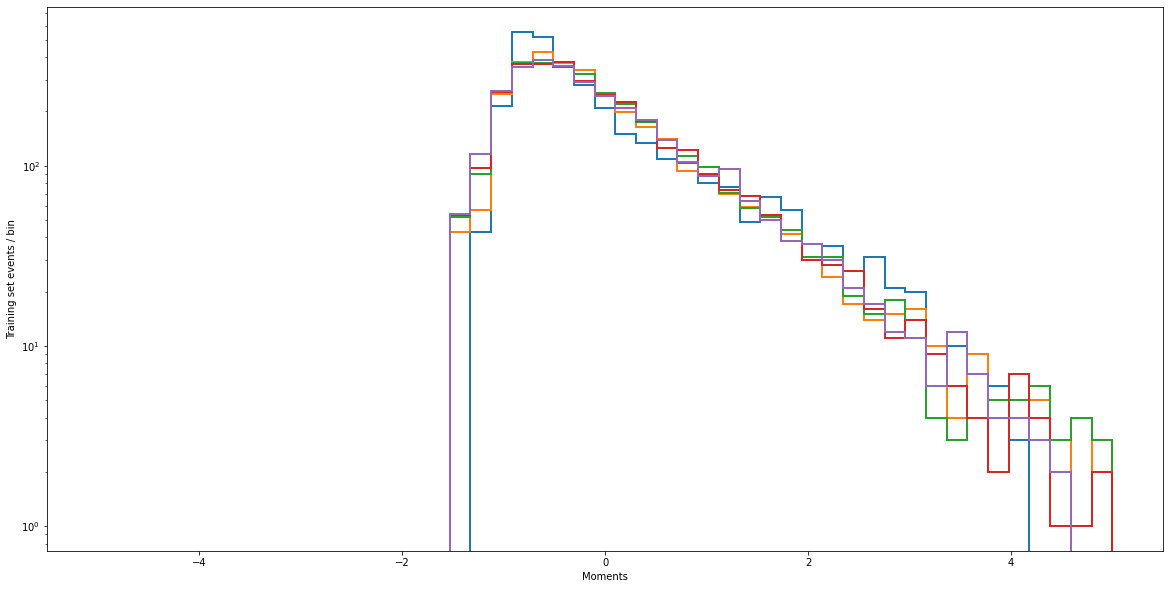

In [652]:
plt.figure(figsize=(20,10))
for m in range(5):
    plt.hist(X_train[:,m], np.linspace(-5,5,50), histtype='step', linewidth=2)
#plt.hist(y_sig, color="tomato", histtype='step', linewidth=2, bins=100)
plt.yscale('log')
#plt.xticks(range(0,1000,20))
plt.xlabel("Moments")
plt.ylabel("Training set events / bin")
#np.save('training_data/bg_truthsqrtshat', this_arr)

In [653]:
X_train.shape

(3200, 40)

### Building the model

In [654]:
# network architecture parameters
dense_sizes = (100, 100)

# network training parameters
num_epoch = 100
batch_size = 100


In [655]:
dnn = DNN(input_dim=40, dense_sizes=dense_sizes, summary=(i==0))

In [656]:
# train model
#dnn.fit(X_train, Y_train,
#    epochs=num_epoch,
#    batch_size=batch_size,
#    validation_data=(X_val, Y_val),
#    verbose=1)

Epoch 1/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7114 - acc: 0.5906 - val_loss: 0.6641 - val_acc: 0.6388
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6532 - acc: 0.6303 - val_loss: 0.6398 - val_acc: 0.6450
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6320 - acc: 0.6484 - val_loss: 0.6366 - val_acc: 0.6525
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6242 - acc: 0.6572 - val_loss: 0.6230 - val_acc: 0.6650
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6173 - acc: 0.6575 - val_loss: 0.6438 - val_acc: 0.6612
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6151 - acc: 0.6656 - val_loss: 0.6222 - val_acc: 0.6637
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6078 - acc: 0.6612 - val_loss: 0.6207 - val_acc: 0.6562
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5991 - a

32/32 [==============================] - 0s 1ms/step - loss: 0.5033 - acc: 0.7406 - val_loss: 0.6636 - val_acc: 0.6550
Epoch 64/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5021 - acc: 0.7487 - val_loss: 0.6543 - val_acc: 0.6650
Epoch 65/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5052 - acc: 0.7425 - val_loss: 0.6488 - val_acc: 0.6587
Epoch 66/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5049 - acc: 0.7472 - val_loss: 0.6361 - val_acc: 0.6888
Epoch 67/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4949 - acc: 0.7547 - val_loss: 0.6601 - val_acc: 0.6888
Epoch 68/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4983 - acc: 0.7469 - val_loss: 0.6359 - val_acc: 0.6750
Epoch 69/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4904 - acc: 0.7575 - val_loss: 0.6545 - val_acc: 0.6662
Epoch 70/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4881 - acc: 0

In [657]:
#Y_predict = dnn.predict(X_test)#,batch_size=1000)

In [658]:
#Y_predict

In [659]:
#import sklearn
#roc_curve = sklearn.metrics.roc_curve(Y_test[:,1], Y_predict[:,1])

Text(0.5, 1.0, 'ROC curve')

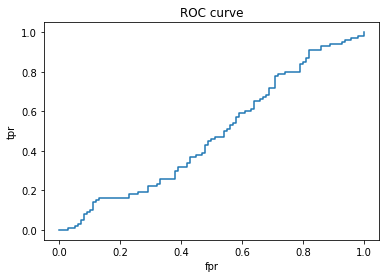

In [660]:
#plt.plot(roc_curve[0],roc_curve[1])
#plt.xlabel('fpr')
#plt.ylabel('tpr')
#plt.title('ROC curve')

In [661]:
#auc = roc_auc_score(Y_test[:,1], Y_predict[:,1])

In [662]:
#auc

0.4809

## Do this in a systematic way

In [671]:
import sklearn
aucs = []
rocs = []
anomalyRatios = [0.01, 0.05, 0.1, 0.15, 0.2, 0.4]
for r in anomalyRatios:
    X_train, X_val, X_test, Y_train,Y_val,Y_test = prep_and_shufflesplit_data(anomaly_ratio=r, size_each = 2000, shuffle_seed = 69,train = 0.8, val = 0.2, test_size_each = 100)
    
    dnn.fit(X_train, Y_train,
    epochs=num_epoch,
    batch_size=batch_size,
    validation_data=(X_val, Y_val),
    verbose=0)
    
    
    Y_predict = dnn.predict(X_test)#,batch_size=1000)
    auc = roc_auc_score(Y_test[:,1], Y_predict[:,1])
    #roc_curve = sklearn.metrics.roc_curve(Y_test[:,1], Y_predict[:,1])
    roc_curve = sklearn.metrics.roc_curve(Y_test[:,1], Y_predict[:,1])
    rocs.append(roc_curve)
    aucs.append(auc)
    
    

Size of sb:
(2000, 40)
Size of bgsig:
(1980, 40)
Size of sig:
(20, 40)
Training set size, distribution:
(3200, 40)
(array([0., 1.]), array([1611, 1589]))
Validations set size, distribution:
(800, 40)
(array([0., 1.]), array([389, 411]))
Test set size, distribution:
(200, 40)
(array([0., 1.]), array([100, 100]))
Size of sb:
(2000, 40)
Size of bgsig:
(1900, 40)
Size of sig:
(100, 40)
Training set size, distribution:
(3200, 40)
(array([0., 1.]), array([1608, 1592]))
Validations set size, distribution:
(800, 40)
(array([0., 1.]), array([392, 408]))
Test set size, distribution:
(200, 40)
(array([0., 1.]), array([100, 100]))
Size of sb:
(2000, 40)
Size of bgsig:
(1800, 40)
Size of sig:
(200, 40)
Training set size, distribution:
(3200, 40)
(array([0., 1.]), array([1620, 1580]))
Validations set size, distribution:
(800, 40)
(array([0., 1.]), array([380, 420]))
Test set size, distribution:
(200, 40)
(array([0., 1.]), array([100, 100]))
Size of sb:
(2000, 40)
Size of bgsig:
(1700, 40)
Size of si

In [672]:
print(aucs)

[0.6403500000000001, 0.6753, 0.61725, 0.6345500000000002, 0.5123, 0.6500999999999999]


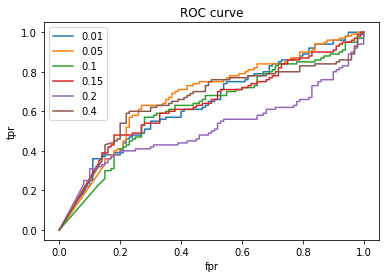

In [673]:
for i,r in enumerate(anomalyRatios):
    plt.plot(rocs[i][0],rocs[i][1],label=r)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.legend()